## DSC478 Winter 2019

## Amy Aumpansub

## Due Date: Feb 26th, 2019

## **<font color=blue>Using Python 3.7 for all tasks performed<font>**

In [1]:
import os

In [2]:
os.chdir('C:\\Users\\Amy\\Desktop\\dsc478\\communities')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold, GridSearchCV, train_test_split, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection

# Problem 1

## a. Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression.

In [7]:
DF_Com = pd.read_csv('communities.csv',na_values=['?'])

In [8]:
DF_Com.head(5)

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [9]:
DF_Com.shape

(1994, 100)

### Basic Statistics

In [10]:
DF_Com.describe(include='all')

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Greenvillecity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,NaN,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,NaN,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,NaN,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,NaN,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000


##### From statistics above, the attribute values are normailized, being in the range from 0 to 1. We have missing values, which we be replaced by the mean attribute in the following section.

In [11]:
# check for missing data
np.sum(np.array(pd.isnull(DF_Com)),0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
#Check the missing value for numerics
missing_value = pd.DataFrame(DF_Com.isnull().sum(0))

In [13]:
missing_value

,0
state,0
communityname,0
population,0
householdsize,0
racepctblack,0
racePctWhite,0
racePctAsian,0
racePctHisp,0
agePct12t21,0
agePct12t29,0


### Fill missing values of "OtherPerCap" with its mean

In [14]:
#Filling in the missing value with Mean attribute
meanPerCap = DF_Com.OtherPerCap.mean()
meanPerCap

0.28474159558454626

In [15]:
DF_Com.OtherPerCap.fillna(meanPerCap, axis=0, inplace=True)
DF_Com[DF_Com.OtherPerCap.isnull()] 

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop


In [16]:
DF_Com.shape

(1994, 100)

In [17]:
# check for other missing data
np.sum(np.array(pd.isnull(DF_Com)),0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Data is now clean, the we will drop some attributes and separate target attribute

In [18]:
# separate attributes for x vars and y var
Com_x = DF_Com.drop(['state','communityname','ViolentCrimesPerPop'], axis=1, inplace = False)
Com_y = DF_Com['ViolentCrimesPerPop']

In [19]:
Com_x.head(5)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


In [20]:
Com_y.head(5)

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
Name: ViolentCrimesPerPop, dtype: float64

## b. Perform standard linear regression on data using the implementation for Ch. 8 of MLA. Compute the RMSE value on the full training data. Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights). Finally, perform 10-fold cross- validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFoldmodule from sklearn.cross_validation).

### Perform standard linear regression

In [21]:
x_var = np.array(Com_x)
x_var = np.array([np.concatenate((v,[1])) for v in x_var])
y_var = np.array(Com_y)

In [22]:
# function from Ch. 8 of MLA
def standRegres(xArr, yArr):
    xMat = np.matrix(xArr) ; yMat = np.matrix(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
    else:
        ws = xTx.I * (xMat.T*yMat)
        return ws

### Display the obtained regression coefficients (weights)

In [24]:
std_linear_reg = standRegres(x_var,y_var)
print ("Regression Coefficients:" , std_linear_reg)

Regression Coefficients: [[ 1.31108068e-01]
 [-3.14114977e-02]
 [ 2.09909670e-01]
 [-4.05351612e-02]
 [-1.38892919e-02]
 [ 5.89726825e-02]
 [ 1.23399025e-01]
 [-2.22621600e-01]
 [-1.47500199e-01]
 [ 5.01635477e-02]
 [-2.42413829e-01]
 [ 4.64024392e-02]
 [-1.96945615e-01]
 [-2.06117500e-01]
 [ 4.65935490e-02]
 [-1.77212915e-01]
 [ 6.30148504e-02]
 [ 1.14942190e-02]
 [-9.08951848e-02]
 [ 2.74640044e-01]
 [ 1.01752476e-01]
 [-3.31517562e-01]
 [-2.91799268e-02]
 [-3.54483393e-02]
 [ 2.26173855e-02]
 [ 4.30950137e-02]
 [ 3.44408548e-02]
 [ 1.28412458e-01]
 [-1.91293360e-01]
 [-1.00769002e-01]
 [ 6.46856092e-02]
 [ 1.06062117e-01]
 [ 2.44125988e-06]
 [ 2.34984611e-01]
 [-3.75705330e-02]
 [-7.74957660e-03]
 [ 4.66779619e-01]
 [ 2.26295907e-01]
 [ 1.74621953e-01]
 [-5.75206227e-01]
 [-1.41954207e-01]
 [ 5.68782538e-02]
 [-3.51066745e-01]
 [-3.49493414e-02]
 [ 4.63705978e-04]
 [ 5.57016681e-02]
 [-1.82238360e-01]
 [-1.54646442e-01]
 [ 1.26172899e-01]
 [-1.44320569e-01]
 [ 2.39071713e-02]
 [ 3.3

### Calculate RMSE

In [25]:
#Calculate RMSE
pred_y = x_var*std_linear_reg
pred_y_T = pred_y.T
error = pred_y_T - y_var
totalError = np.dot(error,error.T)
# Compute RMSE
totalRMSE = np.sqrt(totalError/len(pred_y))
print("The RMSE on Full Training data is %.8f" %totalRMSE)

The RMSE on Full Training data is 0.12888961


#### RMSE on the full training data is: 0.12888961.

### Plot the correlation between the predicted and actual values of the target attribute

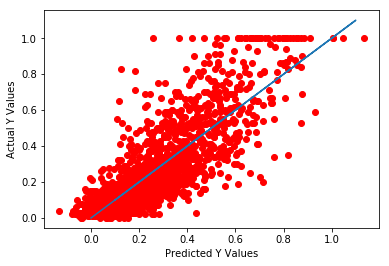

In [26]:
# Plot correlation outputs
plt.plot( pred_y, y_var, 'ro')
plt.plot([0,1.1,0.1],[0,1.1,0.1])
plt.xlabel('Predicted Y Values')
plt.ylabel('Actual Y Values')
plt.show()

### perform 10-fold cross- validation 

In [30]:
n=10
kf = KFold( n_splits=n)
xval_err = 0
for train,test in kf.split(x_var):
    std_linear_reg = standRegres(x_var[train],y_var[train])
    pred_y = (x_var[test])*std_linear_reg
    pred_y_T = pred_y.T
    error = pred_y_T - y_var[test]
    xval_err += np.sqrt(np.dot(error,error.T)/len(x_var[test]))
       
rmse_10cv =  xval_err/n

In [31]:
print("The RMSE from full training data is %f" %totalRMSE)
print("The RMSE from 10 K-folds is %f" %rmse_10cv)

The RMSE from full training data is 0.128890
The RMSE from 10 K-folds is 0.135861


#### The RMSE from 10 K-folds is 0.135861 which is sightly higher than the RMSE on the full training set of 0.12889, so our test error appears to be higher than a train error, implying the possibly overfitting of our model.

## c. FeatureSelection: usethescikit - learnregressionmodelfromsklearn.linear_modelwithasubset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target variable; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. 

In [32]:
x_var = np.array(Com_x)
x_var = np.array([np.concatenate((v,[1])) for v in x_var])
y_var = np.array(Com_y).T

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
#Modify function from Lec 6 example of Feature / Model Selection Strategies
from sklearn.model_selection import cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(x_var, y_var, test_size=0.2)
linear_reg = LinearRegression()

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(X_train, Y_train)
    scores = abs(cross_val_score(linear_reg, X_train_fs, Y_train, cv=5, scoring='neg_mean_absolute_error'))
    print (i,scores.mean())
    results = np.append(results, scores.mean())
    
optimal_percentile = np.where(results == results.min())[0]
index = optimal_percentile.item(0)
print ("\n" ,"Optimal percentile of features:{0}".format(percentiles[index]), "\n")
optimal_num_features = int(percentiles[index]*len(Com_x.columns)/100)
print ("Optimal number of features:{0}".format(optimal_num_features), "\n")


1 0.11276434604143286
6 0.10096844171088974
11 0.1012454264655901
16 0.10147215844032367
21 0.09913148807800067
26 0.0967179060082417
31 0.09664793348053294
36 0.09594670962182875
41 0.09639889059415219
46 0.09652184062942389
51 0.09647921584126622
56 0.09679079983772171
61 0.0975314605409422
66 0.09770773121088558
71 0.09757826948814126
76 0.09764515944381032
81 0.09796099073513448
86 0.09810226228581406
91 0.09726492465875944
96 0.09744278456218332

 Optimal percentile of features:36 

Optimal number of features:34 



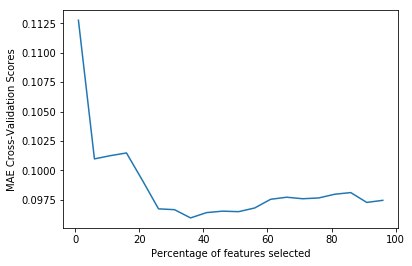

In [44]:
# Plot features percentile VS. MAE scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("MAE Cross-Validation Scores")
pl.plot(percentiles,results)

#### From the graph, we can see that the optimal percentile of features is 36 (has the lowest MAE score).
#### The optimal number of features is 34.

#### Evaluate our best number of features on the test set and performance ( using MAE ) with the new feature set 

In [45]:
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.metrics import mean_absolute_error

optimal_percentile = 41
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = optimal_percentile)
X_train_fs = fs.fit_transform(X_train, Y_train)
linear_reg = LinearRegression()
linear_reg.fit(X_train_fs, Y_train)
X_testfs = fs.transform(X_test)
Y_pred = linear_reg.predict(X_testfs)
MAEscore = mean_absolute_error(Y_test, Y_pred)
print("Mean absolute Error of Linear Model (34 features) is %f" %MAEscore)

Mean absolute Error of Linear Model (34 features) is 0.102111


In [47]:
np.set_printoptions(suppress=True, precision=2, linewidth=80)
print (fs.get_support())

[ True False  True  True False  True False False False False  True False  True
 False False  True False  True False  True  True False False False False False
 False  True  True  True  True False  True False False False  True  True  True
  True False  True  True  True  True False False  True  True False False False
 False False False False False False False  True  True False False False False
  True  True  True  True  True  True  True  True False False  True  True False
 False False False False False False  True False False  True  True False False
 False False False False False False False]


In [48]:
Com_x.columns.values

array(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad',
       'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
       'PctEmplProfServ', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par',
       'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom',
       'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
       'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5',
       'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEn

In [50]:
for i in range(len(Com_x.columns.values)):
    if fs.get_support()[i]:
        print (Com_x.columns.values[i],'\t', fs.scores_[i])

population 	 242.21954906378855
racepctblack 	 987.9890616057469
racePctWhite 	 1358.8179733182715
racePctHisp 	 173.57846535987667
numbUrban 	 234.9816321827691
medIncome 	 338.6234405271587
pctWInvInc 	 809.3145448865988
pctWPubAsst 	 761.1655082613166
medFamInc 	 368.32143358977146
perCapInc 	 216.3737917833643
NumUnderPov 	 388.6570377567564
PctPopUnderPov 	 591.0771584677361
PctLess9thGrade 	 329.19727262332856
PctNotHSGrad 	 488.7932602130596
PctUnemployed 	 527.6520739411234
MalePctDivorce 	 619.9075307836308
MalePctNevMarr 	 172.96686684776742
FemalePctDiv 	 734.3305543341702
TotalPctDiv 	 718.6305617359558
PctFam2Par 	 1570.2841035663116
PctKids2Par 	 1871.95174159244
PctYoungKids2Par 	 1260.794416156771
PctTeen2Par 	 1231.0992532763491
NumIlleg 	 449.59320757129
PctIlleg 	 1847.7568162895536
PctNotSpeakEnglWell 	 181.46594943273328
PctLargHouseFam 	 271.9211545352287
PctPersOwnOccup 	 650.5436057121348
PctPersDenseHous 	 459.83327116767236
PctHousLess3BR 	 485.27364384897714


## d. Next, perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. 

In [52]:
from sklearn.linear_model import Ridge, Lasso 
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(x_var, y_var, test_size=0.2, random_state = 50)

### Systematic Model Selection

In [55]:
#This function is modified from the original function calc_params in Lec 6 example notebook

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from math import sqrt

def best_params(x_var, y_var, clfModel, param_name, param_values, K):
    
    # Convert x, y input to Numpy arrays
    x_var = np.array(x_var)
    y_var = np.array(y_var)

    # Set training and testing scores to 0
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    train_scores_RMSE = np.zeros(len(param_values))
    test_scores_RMSE= np.zeros(len(param_values))
    # iterate over parameter values
    print ("parameter  parameter value    MAE Score(Train)     MAE Score(Test)         RMSE(Train)      RMSE(Test)")
    for i, param_value in enumerate(param_values):
        
        # set classifier parameters
        clfModel.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        k_train_RMSE = np.zeros(K)
        k_test_RMSE = np.zeros(K)
        # create KFold cross validation
        cv = KFold(K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv.split(x_var)):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clfModel.fit([x_var[k] for k in train], y_var[train])
            pred_train = clfModel.predict(x_var[train])
            pred_test = clfModel.predict(x_var[test])   
            k_train_scores[j] = mean_absolute_error(y_var[train], pred_train)
            k_test_scores[j] = mean_absolute_error(y_var[test], pred_test)
            k_train_RMSE[j] = sqrt(mean_squared_error(y_var[train], pred_train))
            k_test_RMSE[j] = sqrt(mean_squared_error(y_var[test], pred_test))
                      
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        train_scores_RMSE[i] = np.mean(k_train_RMSE)
        test_scores_RMSE[i] = np.mean(k_test_RMSE)
        print ("%s: %18.5f  %18.5f  %18.5f  %18.5f  %18.5f"  %(param_name, param_value,train_scores[i], test_scores[i], train_scores_RMSE[i],test_scores_RMSE[i]))
  
    #plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean Absoute Error")

    #return the training and testing scores on each parameter value
    return train_scores, test_scores

### Ridge Regression

In [56]:
# Let's create the alpha input and model input for passing the function above
alphaparameter = np.linspace(0.0001, 20, 20)
alphaparameter = np.array([float(a) for a in alphaparameter])

parameter  parameter value    MAE Score(Train)     MAE Score(Test)         RMSE(Train)      RMSE(Test)
alpha:            0.00010             0.08812             0.09613             0.12434             0.13481
alpha:            1.05273             0.08828             0.09374             0.12593             0.13350
alpha:            2.10535             0.08859             0.09325             0.12680             0.13350
alpha:            3.15798             0.08890             0.09307             0.12744             0.13356
alpha:            4.21061             0.08916             0.09296             0.12793             0.13363
alpha:            5.26323             0.08937             0.09292             0.12834             0.13369
alpha:            6.31586             0.08956             0.09293             0.12868             0.13374
alpha:            7.36848             0.08973             0.09295             0.12898             0.13380
alpha:            8.42111             0.08988    

(array([0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
        0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]),
 array([0.1 , 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
        0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]))

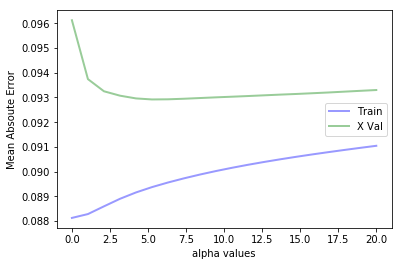

In [57]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
best_params(X_train, Y_train, ridge_model, "alpha", alphaparameter, 5)

#### The best alpha for train and test set would be 3.15798 with the lowest MAE score and RMSE score.
#### So, we will fit the Ridge regrssion model with the alpha = 3.15798.

In [71]:
ridge_model = Ridge(fit_intercept=True, alpha=3.15798)
ridge_model.fit(X_train, Y_train)
pred_Y = ridge_model.predict(X_test)
err = pred_Y-Y_test
total_error = np.dot(err,err)
RMSEScore_Rid = np.sqrt(total_error/len(pred_Y))
MAEScore_Rid = mean_absolute_error(Y_test, pred_Y)
print("Ridge Regression")
print('Mean absolute error on test data: %0.8f' % MAEScore_Rid)
print('RMSE error on test data: %0.8f' % RMSEScore_Rid)

Ridge Regression
Mean absolute error on test data: 0.10164740
RMSE error on test data: 0.14658250


### Lasso Regression

parameter  parameter value    MAE Score(Train)     MAE Score(Test)         RMSE(Train)      RMSE(Test)
alpha:            0.00010             0.08798             0.09482             0.12464             0.13387
alpha:            1.05273             0.17177             0.17178             0.22563             0.22551
alpha:            2.10535             0.17177             0.17178             0.22563             0.22551
alpha:            3.15798             0.17177             0.17178             0.22563             0.22551
alpha:            4.21061             0.17177             0.17178             0.22563             0.22551
alpha:            5.26323             0.17177             0.17178             0.22563             0.22551
alpha:            6.31586             0.17177             0.17178             0.22563             0.22551
alpha:            7.36848             0.17177             0.17178             0.22563             0.22551
alpha:            8.42111             0.17177    

(array([0.09, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17,
        0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17]),
 array([0.09, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17,
        0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17]))

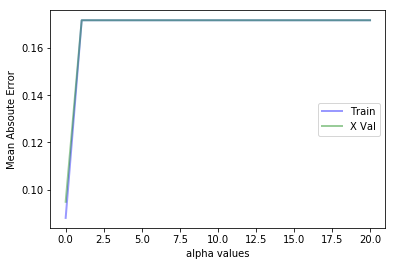

In [72]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
best_params(X_train, Y_train,lasso_model, "alpha", alphaparameter, 5)

#### From the graph and table above, the MAE and RMSE scores are relatively constant as the alpha value increases beyond 1.05.
#### The best alpha for train and test set would be 0.0001 with the lowest MAE score and RMSE score.
#### So, we will fit the Lasso regrssion model with the alpha = 0.0001

In [75]:
Lasso_model = Lasso(fit_intercept=True, alpha=0.0001)
Lasso_model.fit(X_train, Y_train)
pred_Y = Lasso_model.predict(X_test)
err = pred_Y-Y_test
total_error = np.dot(err,err)
RMSEScore_Las = np.sqrt(total_error/len(pred_Y))
MAEScore_Las = mean_absolute_error(Y_test, pred_Y)
print ("Lasso Regression")
print('Mean absolute error on test data: %0.8f' % MAEScore_Las)
print('RMSE error on test data: %0.8f' % RMSEScore_Las)

Lasso Regression
Mean absolute error on test data: 0.10179228
RMSE error on test data: 0.14685379


### Summary of Observations


**Comparing between 2 models, the Ridge Regression model performs slightly better as both its MAE and RMSE scores are lower than those of Lasso Model.**

#### Ridge Regression
- For Ridge regression, the best alpha is equal to 3.15874, which has the lowest MAE score of 0.09307(Test).
- From the graph above, the MAE score of test set increases as the alpha value increases.
- Fitting model with 20% of data (test set), our Ridge model has the MAE of 0.1016 and the RMSE of 0.1465.
- Both RMSE and MAE indicates how well of our model can explain the overall data, the the lower error is better

#### Lasso Regression
- For Lasso regression, the best alpha is equal to 0.0001, which has the lowest MAE score of 0.09319(Test).
- From the graph above, the MAE score of test set increases significantly from alpha value = 0.0001 to 1.
- Then the MASE score stays constant beyond alpha = 1 to 20.
- Fitting model with 20% of data (test set), our Lasso model has the MAE of 0.1017 and the RMSE of 0.1468.
- Both RMSE and MAE indicates how well of our model can explain the overall data, the the lower error is better.

## e.Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Again

In [76]:
x_var = np.array(Com_x)
y_var = np.array(Com_y)

### Split data: 20% test and 80% train
### Standarize scale and perform GridSearch ( k=5 )

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_var)
x_s = scaler.transform(x_var)
#Split data to 20% test 80% train
X_train, X_test, Y_train, Y_test = train_test_split(x_s, y_var, test_size=0.2, random_state = 50)

sgdreg = SGDRegressor()
GridSerach = GridSearchCV(sgdreg,{'penalty': ['l2','l1'],'alpha': np.linspace(0.0001, 10, 100)}, cv=5, verbose=0)
GridSerach.fit(X_train, Y_train)
print(GridSerach.best_params_)
print(GridSerach.best_score_)

{'alpha': 0.0001, 'penalty': 'l2'}
0.63703450223723


### From the GridSearch, the best parmeter is 'penalty': 'l2' and 'alpha': 0.0001
### We will use these parameter in the SGDRegressor

In [78]:
from sklearn.linear_model import ElasticNet, SGDRegressor 

sgdreg=SGDRegressor(penalty='l2', alpha=0.0001, n_iter=200)
# Calculate the RMSE for fitting a single model
#For train model
sgdreg.fit(X_train,Y_train)
p_train = sgdreg.predict(X_train)
err_train = p_train-Y_train
total_error_train = np.dot(err_train,err_train)
rmse_train = np.sqrt(total_error_train/len(p_train))
MAE_train = mean_absolute_error(Y_train, p_train)

#For test model
sgdreg.fit(X_train,Y_train)
p_test = sgdreg.predict(X_test)
e_test = p_test-Y_test
xval_err_test = np.dot(e_test,e_test)
rmse_test = np.sqrt(xval_err_test/len(p_test))
MAE_test = mean_absolute_error(Y_test, p_test)

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)  
print('RMSE on train: %f' %rmse_train)
print('RMSE on test:  %f' %rmse_test)  
print('MAE on train:  %f' %MAE_train)
print('MAE on test:   %f' %MAE_test) 

Method: Stochastic Gradient Descent Regression
RMSE on train: 0.125977
RMSE on test:  0.145399
MAE on train:  0.088846
MAE on test:   0.101156


parameter  parameter value    MAE Score(Train)     MAE Score(Test)         RMSE(Train)      RMSE(Test)
l1_ratio:            0.00000             0.09435             0.09767             0.13264             0.13762
l1_ratio:            0.05263             0.09295             0.09697             0.13150             0.13792
l1_ratio:            0.10526             0.09303             0.09831             0.13068             0.13811
l1_ratio:            0.15789             0.09345             0.09758             0.13155             0.13731
l1_ratio:            0.21053             0.09265             0.09835             0.13105             0.13844
l1_ratio:            0.26316             0.09262             0.09766             0.13041             0.13722
l1_ratio:            0.31579             0.09102             0.09450             0.12988             0.13550
l1_ratio:            0.36842             0.09356             0.09767             0.13134             0.13827
l1_ratio:            0.42

(array([0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09,
        0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]),
 array([0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.09, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
        0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ]))

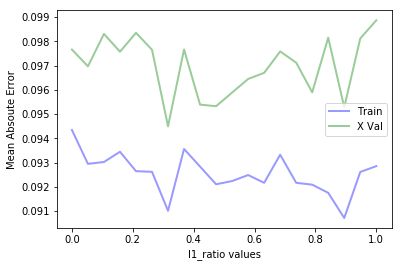

In [79]:
l1_parameter = np.linspace(0.0,1.0, 20)
l1_parameter = np.array([float(l) for l in l1_parameter])
sgd = SGDRegressor(penalty='elasticnet')
best_params(X_train, Y_train, sgd, "l1_ratio" ,l1_parameter, 5)         

#### From the graph above, the MAE score of train and test is relatively volatile as the l1_ratio value increases. The best l1_ratio for test set would be 0.57895 with the lowest MAE and RMSE for test set.

#### Fitting model with the best l1_ratio = 0.89474

In [80]:
sgd_model = SGDRegressor(penalty='elasticnet', l1_ratio=0.89474)
sgd_model.fit(X_train, Y_train)
pred_Y = sgd_model.predict(X_test)
err = pred_Y-Y_test
total_error = np.dot(err,err)
RMSEScore_sgd = np.sqrt(total_error/len(pred_Y))
MAEScore_sgd = mean_absolute_error(Y_test, pred_Y)
print ("SGD Regression")
print('Mean absolute error on test data: %0.8f' % MAEScore_sgd)
print('RMSE error on test data: %0.8f' % RMSEScore_sgd)

SGD Regression
Mean absolute error on test data: 0.10499476
RMSE error on test data: 0.15328173


### Summary of Observations

#### From Part b. : Standard Linear Regression
- The RMSE from full training data is 0.128890
- The RMSE from 10 K-folds is 0.135861

#### From Part d. : Ridge Regression
- Mean absolute error on test data: 0.101647
- RMSE error on test data (20%): 0.1465825

#### From Part d. : Lasso Regression
- Mean absolute error on test data: 0.1017922
- RMSE error on test data (20%): 0.14685379

#### From Part e. : SGDRegessor
- RMSE on train: 0.125977 (GridSearch)
- RMSE on test: 0.145399 (GridSearch)
- RMSE error on test data (20%): 0.14899100 (model selection l1_ratio = 0.89)

All models performs relatively well and in a similar fashion, which the RMSE from SGD regressor is slightly higher than that of Lasso and Ridge Regression. From the GridSearch, the best ratio {'penalty': 'l2', 'alpha': 0.0001} From the graph above, the MAE score of train and test is relatively volatile as the l1_ratio value increases. The best l1_ratio for train and test set would be 0.895 with the lowest MAE. From the model selection (l1_ratio = 0.895), The RMSE score is 0.148991 comparing to other models, this model has the highest RMSE score, so it relatively underperforms.

## Problem 2 Automatic Document Clustering [ Dataset : newsgroups5.zip ]

In [82]:
import os
os.chdir('C:\\Users\\Amy\\Desktop\\dsc478\\newsgroups5')

In [83]:
import numpy as np
import pylab as plt
import pandas as pd
from sklearn.cluster import KMeans

## a. Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.

#### Notes:
- We will use kMeans and Random_centroid functions from Ch 10 in part C
- So, D and x is are array inputs from Kmeans function in part C

In [84]:
def Cos_Sim(x,D):# where D and x is are array inputs from Kmeans function in part C
    
    normX = np.linalg.norm(x)
    normD = np.linalg.norm(D)
    CosSim = np.dot(D,x)/(normD * normX )
    dist = 1 - CosSim
    return dist
            

## b. Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.

In [85]:
Docs= np.loadtxt("matrix.txt",dtype=int, delimiter=',')
Docs_DT = pd.DataFrame(Docs.T)
Classes = np.loadtxt("classes.txt", dtype=int, delimiter=' ',skiprows=1)
Classes_DF = pd.DataFrame(Classes)
Classes_DF = Classes_DF.drop(Classes_DF.columns[0], axis=1)
Label = np.loadtxt("terms.txt", dtype=str, delimiter='\t')
Label_DF = np.array(pd.DataFrame(Label))

In [86]:
Docs_DT.head(5)

,0,1,2,3,4,5,6,7,8,9,...,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
Classes_DF.head()

,1
0,0
1,1
2,1
3,1
4,2


In [88]:
Label_DF

array([['aa'],
       ['aargh'],
       ['aaron'],
       ...,
       ['zw'],
       ['zx'],
       ['zz']], dtype=object)

### Split data into 20% test and 80% train

In [91]:
 #Split data into 20% test, 80% train
from sklearn.model_selection import train_test_split
Docs_train_DT, Docs_test_DT, Classes_train, Classes_test = train_test_split(Docs_DT, Classes_DF, test_size=0.2, random_state=50)
print (Docs_train_DT.shape)
print (Docs_test_DT.shape)
print (Classes_train.shape)
print (Classes_test.shape)

(2000, 9328)
(500, 9328)
(2000, 1)
(500, 1)


## c. Perform Kmeans clustering on the training data. Write a function to display the top N terms in each cluster along with the cluster DF values for each term and the size of the cluster. 

In [93]:
Docs_DT = Docs_train_DT
Docs_TD = Docs_DT.T
Docs_DT_test = Docs_test_DT
Docs_TD_test = Docs_DT_test.T

numTerms= Docs_TD.shape[0]
NDocs = Docs_TD.shape[1]
termFreqs = Docs_train_DT.sum(axis=1) 
DF_Train = np.array([(Docs_TD!=0).sum(1)]).T

# Create a matrix with all entries = NDocs
NMatrix = np.ones(np.shape(Docs_TD), dtype=float)*NDocs
#Find IDF
IDF = np.log2(np.divide(NMatrix, DF_Train))
print (IDF[0:10,])

[[7.8  7.8  7.8  ... 7.8  7.8  7.8 ]
 [9.38 9.38 9.38 ... 9.38 9.38 9.38]
 [6.72 6.72 6.72 ... 6.72 6.72 6.72]
 ...
 [9.38 9.38 9.38 ... 9.38 9.38 9.38]
 [5.76 5.76 5.76 ... 5.76 5.76 5.76]
 [3.8  3.8  3.8  ... 3.8  3.8  3.8 ]]


##### Notes:
- We need to perform TFxIDF normalization on the training set seperately and then use the IDF-vector from the training set to calculate the TF-IDF vectors of the test set. Test set is small and has the purpose for testing the model not testing the IDF performance, so we shouldn't do TFxIDF sepeartely for the test set
- We will replace the small value, large value, and NaN of IDF metric with 0.

In [96]:
from numpy import inf, isnan

#Train set (80% = 2000 values)
tdTFxIDF_train = np.array(Docs_TD * IDF)
dtTFxIDF_train = tdTFxIDF_train.T
dtTFxIDF_train[np.isnan(dtTFxIDF_train)] = 0
dtTFxIDF_train[dtTFxIDF_train == inf] = 0
dtTFxIDF_train[dtTFxIDF_train == -inf] = 0
print ("TFxIDF Train set ")
print ("          SHAPE  : ", dtTFxIDF_train.shape)
print ("          MIN    : ",dtTFxIDF_train.min())

#Test set (20% = 5000 values)
tdTFxIDF_test = np.array(Docs_TD_test * IDF[:,:500])
dtTFxIDF_test = tdTFxIDF_test.T
dtTFxIDF_test[np.isnan(dtTFxIDF_test)] = 0
dtTFxIDF_test[dtTFxIDF_test == inf] = 0
dtTFxIDF_test[dtTFxIDF_test == -inf] = 0
print ("TFxIDF Test set ")
print ("          SHAPE  : ", dtTFxIDF_test.shape)
print ("          MIN    : ", dtTFxIDF_test.min())

TFxIDF Train set 
          SHAPE  :  (2000, 9328)
          MIN    :  0.0
TFxIDF Test set 
          SHAPE  :  (500, 9328)
          MIN    :  0.0


### <font color = blue>Notes:</font>
##### <font color = blue>We will use the metric "dtTFxIDF_train" for clustering</font>
##### <font color = blue>The following functions randCent and kMeans are from the ML book Ch. 10 kMeans.py</font>

### <font color = red>The imported module from kMeans.py doesn't work, because  I use different version of Python</font>
### <font color = red>so, I copied and pasted the functions to this notebook.</font>

In [105]:
#import kMeans.py doesn't work, so copy the whole codes
#import kMeans as kmeans
from numpy import *

In [98]:
#Create centroids function modified from (Ch 10)
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = zeros((k,n), dtype=float)
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k)
    return centroids 

In [99]:
#Test function with k = 2 centroids
randCent(dtTFxIDF_train,2)

array([[ 7.98,  2.46, 23.21, ..., 18.5 , 34.34, 17.6 ],
       [ 0.2 ,  4.74, 12.13, ..., 33.58, 20.06,  7.36]])

In [100]:
def kMeans(dataSet, k, distMeas=Cos_Sim, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment

## The findTerms function prints top N terms with high frequency in each cluster

In [106]:
#####Function returns the top N term of each cluster
import numpy as np
from numpy import *
def findTerms(Data, k, N):
    #MatData = np.mat(Data)
    myCentroids, clustAssing = kMeans(Data,k)
    for i in range(0,k,1):
        print("CLUSTER: %d   results" %(i))
        clusterNum = clustAssing[:,0]#Clustering Number
        clusterDT = Data[clusterNum == i]#Create Matrix for each cluster (DT)
        numDocs =  clusterDT.shape[0]#add row of each cluster Matrix
        print ("Number of documents in cluster : %8d   " %(numDocs))
        DocsFreq = np.array([(clusterDT.T!=0).sum(1)]).T
        freqPercent = DocsFreq/float(numDocs)
        Results = np.concatenate((Label_DF, DocsFreq, freqPercent), axis=1)#each element = [percentFreq, freq, term]
        sortedResults = np.flip(Results[Results[:,-1].argsort()])#Sorted by decesending order
        print ("        Word      DF    PercentofDocs")
        for i, result in enumerate(sortedResults[:N]):
            term = result[2]
            DF = result[1]
            freqPer = (result[0]*100)
            print ("%12s   %5d   %14.6f  "  %(term, DF , freqPer)) 
        print ("-----------------------------------------------------")
    return myCentroids, clustAssing


In [107]:
centroids, clustAssing = findTerms(dtTFxIDF_train, 5, 10)

CLUSTER: 0   results
Number of documents in cluster :      811   
        Word      DF    PercentofDocs
       write     476        58.692972  
          on     380        46.855734  
      articl     353        43.526510  
        know     291        35.881628  
       think     287        35.388409  
        just     272        33.538841  
          go     270        33.292232  
        time     251        30.949445  
         see     250        30.826141  
       peopl     249        30.702836  
-----------------------------------------------------
CLUSTER: 1   results
Number of documents in cluster :      770   
        Word      DF    PercentofDocs
      window     290        37.662338  
        sale     232        30.129870  
       thank     219        28.441558  
       pleas     218        28.311688  
       email     214        27.792208  
       write     210        27.272727  
          on     206        26.753247  
         get     198        25.714286  
        work     1

## d. Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.

In [108]:
Classes_train_T = Classes_train.T
Classes_train_T

,2316,2146,398,215,1730,1662,912,1019,374,1070,...,2143,70,2277,2118,132,2014,2157,1931,1504,1712
1,2,4,0,1,4,0,2,1,4,4,...,2,4,2,3,0,4,1,0,4,0


In [109]:
Classes_train_T = np.array(Classes_train_T)[0]
Classes_train_T

array([2, 4, 0, ..., 0, 4, 0])

In [110]:
clusterResults = clustAssing[:,0].astype(int) 
clusterResults 

array([0, 1, 1, ..., 1, 1, 1])

In [112]:
from sklearn.metrics import completeness_score, homogeneity_score

completeScore = completeness_score(Classes_train_T,clusterResults)
homoScore = homogeneity_score(Classes_train_T,clusterResults)

print ('The completeness of 5 Clusters :  %.8f' %completeScore)
print ('The homogeneity of  5 Clusters :  %.8f' %homoScore)

The completeness of 5 Clusters :  0.79187061
The homogeneity of  5 Clusters :  0.54095119


#### Summary
- The completeness of 0.79187 is relative high, implying that majority samples of a single given class are assigned to the same cluster.
- The homogeneity score of 0.5409 is moderately high, indicating that samples of a single class belong to a single cluster.

## e. Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate cluster. Your categorization should be based on Cosine similarity between each test document and cluster centroids. For each test document show the predicted class label as well as Cosine similarity to the corresponding cluster.

In [113]:
centroids

array([[ 0.03,  0.03,  0.22, ...,  0.  ,  0.  ,  0.  ],
       [ 0.04,  0.  ,  0.05, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 5.2 ,  0.  ,  0.  , ...,  8.3 ,  4.69, 11.21],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [114]:
dtTFxIDF_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Notes: I wrote 2 new functions. 
####           1. Cos_Similarity( ) that take 2 array inputs and return Cosine Similarity (not distance)
####           2. predict_Cluster( ) that take 2 array inputs and print Cosine Similarity and predicted clusture of each test doc.

In [115]:
def Cos_Similarity(x,D):#return Cosine Similarity not Distance  
    normX = np.linalg.norm(x)
    normD = np.linalg.norm(D)
    CosSim = np.dot(D,x)/(normD * normX )
    return CosSim

In [117]:
def predict_Cluster(data, centroids, Measuredist=Cos_Similarity):
    print (" Index Doc.  Cluster 0   Cluster 1   Cluster 2   Cluster 3   Cluster 4    Predicted Class")
    index = 0
    for row in data:#iterate each documents
        cluster = 0 #0,1,2,3,4
        cosSim = []
        for centinCluster in centroids:
            CosSimValue = Measuredist(row, centinCluster)
            cosSim.append(CosSimValue)
        pred_cluster = cosSim.index(max(cosSim))
        print ("%10d %11.5f %11.5f %11.5f %11.5f %11.5f %10d " %(index, cosSim[0],cosSim[1],cosSim[2],cosSim[3],cosSim[4], pred_cluster))
        index += 1

### Predicted 5 Clusters based on Cosine Similarity     --->  ( Cluster#  0, 1, 2, 3, 4 )
#### where row = docs, columns = Cosine Similarity in each cluster
#### 5 Clusters ranges from: 0, 1, 2, 3, 4

In [118]:
results= predict_Cluster(dtTFxIDF_test, centroids)

 Index Doc.  Cluster 0   Cluster 1   Cluster 2   Cluster 3   Cluster 4    Predicted Class
         0     0.19638     0.05548     0.04851     0.00460     0.00002          0 
         1     0.20175     0.05433     0.06399     0.00283     0.00000          0 
         2     0.07082     0.07550     0.11795     0.01059     0.00000          2 
         3     0.02718     0.11395     0.03003     0.00265     0.00001          1 
         4     0.12314     0.05226     0.05014     0.01283     0.00002          0 
         5     0.15828     0.04837     0.04174     0.00087     0.00000          0 
         6     0.04207     0.08218     0.03448     0.00143     0.00000          1 
         7     0.13907     0.14743     0.30194     0.00506     0.00001          2 
         8     0.13422     0.04198     0.06953     0.00115     0.00000          0 
         9     0.05048     0.11441     0.04102     0.00402     0.00000          1 
        10     0.11040     0.09275     0.29547     0.00441     0.00001          